## Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Checking for duplicate and null values

In [4]:
df.duplicated().sum()

27

Insight: This data contains 27 duplicate values.

#### Reomving duplicate values.

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isna().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [7]:
df[df['Region'].isna() == True]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insight: This dataset contains one record which contains only nan value in each column.

#### Removing the row of nan value

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


## Visualizations

In [10]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [11]:
df[' Frequency'].value_counts()

 Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

Insight: The Frequency column contains only data 'Monthly' but it differs may be due to add up of some space. So this column is of no use and it can be dropped.

In [12]:
df.drop(columns=' Frequency', axis=1, inplace=True)

#### Removing space(if any) from the starting and ending of the column names

In [13]:
col = []
for i in range(len(df.columns)):
    j = df.columns[i].strip()
    col.append(j)
col

['Region',
 'Date',
 'Estimated Unemployment Rate (%)',
 'Estimated Employed',
 'Estimated Labour Participation Rate (%)',
 'Area']

In [14]:
df.columns = col

In [15]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


Text(1.0, 1.0, 'Date Wise Average Employment Graph')

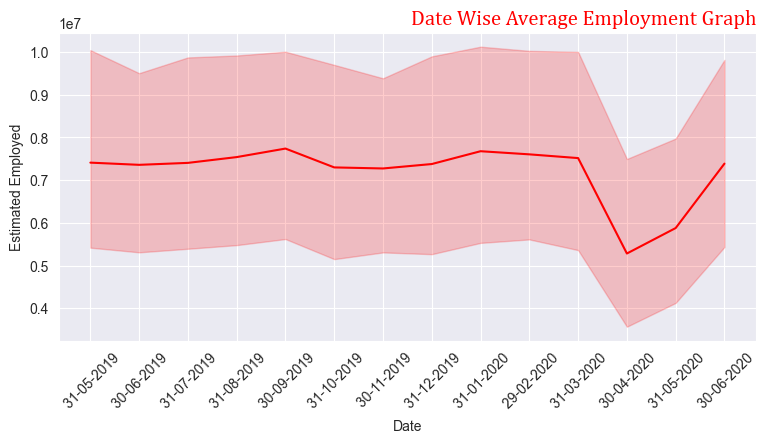

In [30]:
plt.figure(figsize=(9, 4))
sns.set_style("darkgrid")
sns.lineplot(df, x='Date', y='Estimated Employed', color='red')
plt.xticks(rotation=45)
plt.title("Date Wise Average Employment Graph",color='red', font='cambria', fontsize=15, loc='right')


Insight: It shows there was a consistency of employment till March 2020. But as soon as the whole world went locked down due to severe covid 19 attack, the employemnt suddenly dropped and went up again as soon as the first lockdown period was over.

In [17]:
df.columns

Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Text(1.0, 1.0, 'State wise average unemployment rate')

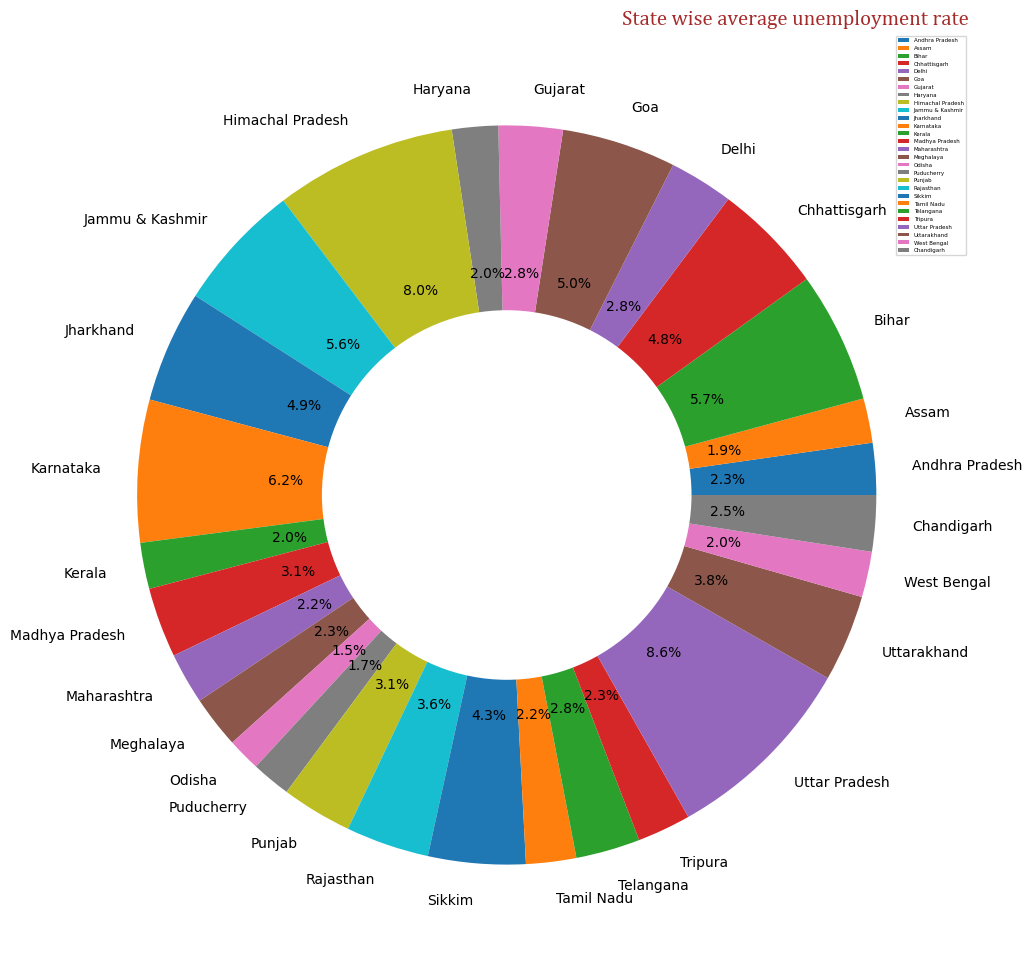

In [18]:
plt.figure(figsize=(16,12))
plt.pie(df.groupby('Region')['Estimated Unemployment Rate (%)'].mean(), labels=df['Region'].unique(), autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(fontsize=4)
plt.title("State wise average unemployment rate", color='brown', font='cambria', fontsize=15, loc='right')

Insight: The average unemployment rate was maximum in UP. Apart from that, considering the unemployment rate to be significant if above 5%; the enlisted states were Himachal Pradesh, Goa, Jammu & Kashmir, Karnataka and Bihar. Some states nearly to be enlisted to this list were Jharkhand, Chhattisgarh and Sikkim.

Text(1.0, 1.0, 'State wise average Labour Participation')

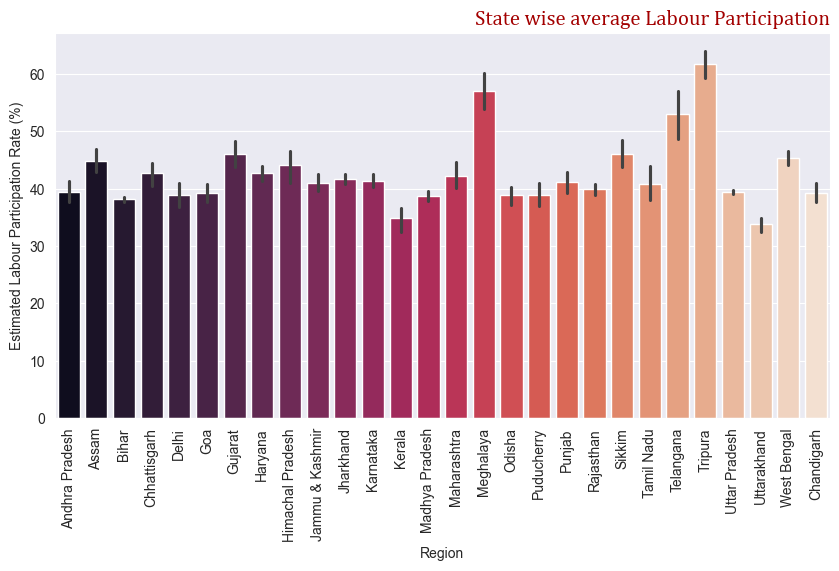

In [31]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.barplot(df, x='Region', y='Estimated Labour Participation Rate (%)', palette='rocket', native_scale=True)
plt.xticks(rotation=90)
plt.title("State wise average Labour Participation", color='#A30000', font='cambria', fontsize=15, loc='right')

Insight: The average employment rate during corona period was in Meghalaya, Telengana and Tripura.

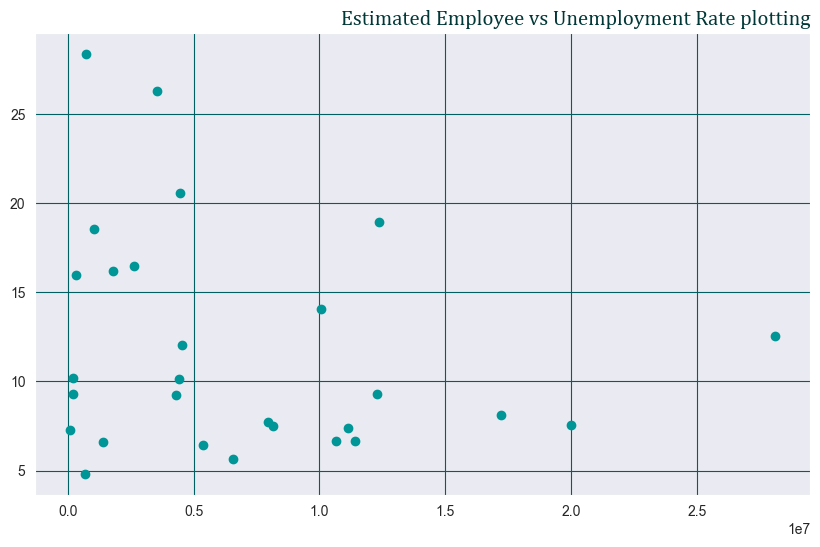

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(df.groupby('Region')['Estimated Employed'].mean(), df.groupby('Region')['Estimated Unemployment Rate (%)'].mean(), color='#009596')
plt.title("Estimated Employee vs Unemployment Rate plotting", color='#003737', font='cambria', fontsize=15, loc='right')
plt.grid(True, zorder=3, color='#005F60')

Insights: All states having Average Unemployment rate above 15% are of labour employment below 1.5 cr.